# South Park: Understanding Success

Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula

#### Team Members Names:  Zachary Wieselthier, Laura Martin, Sean Worth, Ryan Nicholls


In [2]:
!pip install pystan

In [4]:
#Import Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro #normallity test
from scipy.stats import mstats
#from fbprophet import Prophet


#Import Data and Create Data Frame
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The shareable link
link = 'https://drive.google.com/open?id=1gYuaFGvYj0mc2g3H7XmQF25XAp2pWqIX' 
fluff, id = link.split('=')

# Dataset is now stored in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('South Park_Pub.csv')  
sp = pd.read_csv('South Park_Pub.csv')
sp = sp.fillna(0) 
sp.head(4)


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/discovery/v1/apis/drive/v2/rest
INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1gYuaFGvYj0mc2g3H7XmQF25XAp2pWqIX?alt=json


,ID,Title,Director,Writer,Original Air Date,Rating,All,Anchor,Announcer,Barbra Streisand,...,Timmy,Token,Tom,Towelie,Truck Driver,Tweek,Wendy,Woman,Unnamed: 150,Unnamed: 151
0,1_1,"""Cartman Gets an Anal Probe""",Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,8/13/1997,8.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
1,1_2,"""Weight Gain 4000""",Matt Stone & Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,8/20/1997,7.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0
2,1_3,"""Volcano""",Matt Stone & Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,8/27/1997,7.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1_4,"""Big Gay Al's Big Gay Boat Ride """,Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,9/3/1997,7.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Descriptive Statistics

In [0]:
#Calculate Mean
avg_rating = sp["Rating"].mean() 
#Calculate Median
med_rating =sp['Rating'].median() 
#Calculate total number of episodes
count_episodes = sp['ID'].count() 
from scipy.stats import shapiro
#Print Results
print 'Descriptive Statistics'
print'==================================='
print 'Average Episode Rating =', ("%.2f" % avg_rating)
print 'Median Episode Rating =',  med_rating
print 'Total number of Episodes =', count_episodes
print''
print 'Normallity'
print'==================================='
stat, p = shapiro(sp['Rating'])
print 'p = ', p
if p<.05:
   print 'Failed Normallity Test'

Descriptive Statistics
Average Episode Rating = 8.14
Median Episode Rating = 8.2
Total number of Episodes = 79

Normallity
p =  0.00274300435558
Failed Normallity Test


The average rating is an 8.14 and the median is an 8.2.

Population size is 79 episodes.

The rating does not follow a normal distribution by the Shapiro Wilk test resulting in a P value of .0027, which is less than the alpha value of .05.

Text(0.5,0,u'Rating')

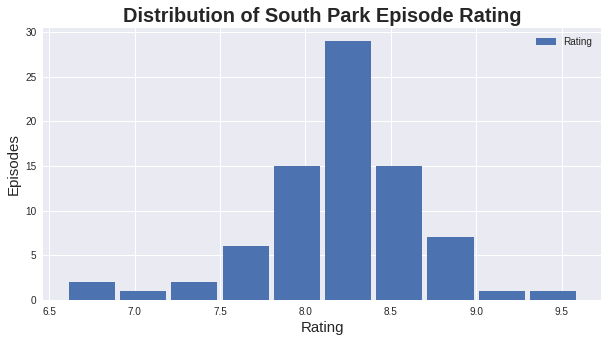

In [0]:
x = sp[['Rating']]

#Plotting graph
x.plot.hist(figsize=(10,5),grid=True, bins=10, rwidth=.9) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Distribution of South Park Episode Rating', fontsize=20, fontweight='bold')
plt.ylabel('Episodes', fontsize=15)
plt.xlabel('Rating', fontsize=15)

By plotting a histogram to visualize the distribution of ratings per episode, we can observe that the data is slightly right, and follows a near bimodal distribution. Most of the episode’s ratings fall between 8.0 and 8.5, while some ratings were as low as 6.7 and as high as 9.5. In descriptive statistics the difference between the average and the median episode rating is another representation of normality. The difference is .06 which is very small, yet it is not normal.

In [0]:
#Defining Independent Variables
X = sp[['Butters', 'Cartman', 'Chef', 'Gerald', 'Jesus', 'Jimbo', 'Kenny',
        'Kyle', 'Liane', 'Mayor McDaniels', 'Mr. Garrison', 'Mr. Mackey',
        'Officer Barbrady', 'Randy', 'Sharon', 'Sheila', 'Stan', 'Terrance',
        'Wendy']]   

X.sum() 

Butters              310.0
Cartman             3572.0
Chef                 740.0
Gerald               268.0
Jesus                221.0
Jimbo                511.0
Kenny                468.0
Kyle                2970.0
Liane                283.0
Mayor McDaniels      218.0
Mr. Garrison         825.0
Mr. Mackey           325.0
Officer Barbrady     200.0
Randy                409.0
Sharon               298.0
Sheila               350.0
Stan                3273.0
Terrance             234.0
Wendy                263.0
dtype: float64

### Linear Regression - Character Lines

In [0]:
#Defining Dependent Variable
Y = sp['Rating']     

#Defining Independent Variables
X = sp[['Butters', 'Cartman', 'Chef', 'Gerald', 'Jesus', 'Jimbo', 'Kenny',
        'Kyle', 'Liane', 'Mayor McDaniels', 'Mr. Garrison', 'Mr. Mackey',
        'Officer Barbrady', 'Randy', 'Sharon', 'Sheila', 'Stan', 'Terrance',
        'Wendy']] 
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.495
Date:                Thu, 27 Dec 2018   Prob (F-statistic):              0.121
Time:                        02:13:12   Log-Likelihood:                -38.432
No. Observations:                  79   AIC:                             116.9
Df Residuals:                      59   BIC:                             164.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1980      0.229  

A linear regression was used to understand the correlation between a characters presence and the episode’s rating; the more lines a character speaks the more presence they have in an episode.The regression was not statistically significant with a P value of .121, suggesting that character presence does not have an impact on the rating of an episode.

In addition, the model’s low R^2 value of .325 means that only 32% of the variance can be explained from characters speaking roles. There are other factors that explain a majority of the variance in an episodes rating.The majority of individual characters do not have a statistically significant correlation on the episodes rating based on having P values greater than the alpha of .05.

Even though the model was not statistically significant, the character Terrance had a statistically significant impact, with a P value of .001. The negative beta value of -0.0157 shows that the presence of Terrance has a negative correlation with the episode's rating.

### Visualization:

Text(0.5,1.02,u'Signigicant Character Pair Plot for South Park')

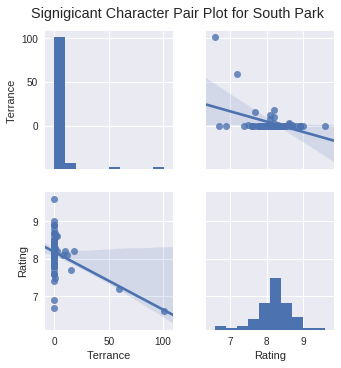

In [0]:
#In the regression table we found 1 characters with a statistical significance to the rating: Terrance. 

#Terrance compared to rating
lines_Rating = sp[['Terrance', 'Rating']]

#Regression visual on significant character vs rating
sns.pairplot(lines_Rating, kind='reg') 

plt.suptitle('Signigicant Character Pair Plot for South Park', y=1.02)

Even though the regression model was not statistically significant to the rating, a pairplot was ran to visualize the slope of the regression line of the lines spoken by Terrance compared to rating.

### Director Hypothesis Test

In [0]:
#Kruskal Wallis H-test
import numpy as np
from scipy.stats import mstats

TP = sp.loc[sp['Director'] == "Trey Parker"]
TP = TP['Rating'].values


MSTP = sp.loc[sp['Director'] == "Matt Stone & Trey Parker"]
MSTP = MSTP['Rating'].values


ES = sp.loc[sp['Director'] == "Eric Stough"]
ES = ES['Rating'].values

other = sp.loc[(sp['Director'] != 'Trey Parker') & (sp['Director'] != 'Matt Stone & Trey Parker') & (sp['Director'] != 'Eric Stough') ]
other = other['Rating'].values
other


H, pval = mstats.kruskalwallis(TP, MSTP, ES, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")

Kruskal Wallis H-test test:
('H-statistic:', 2.3607101777515873)
('P-Value:', 0.5009903115087313)
Fail to reject null hypothesis


The Kruskal Wallis test is the non-parametric alternative to the One Way ANOVA. Non parametric means that the test does not assume the data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA are not met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data’s values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this project is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal. The Kruskal Wallis test will identify if there is a significant difference between multiple groups.

The groupings were made in excel, on a pivot table. Directors who directed five times or less are grouped as “Other”, and all others above five are in their own individual group.In this case we failed to reject the null hypothesis, which means our groups are similar. The data suggests directors have an impact on rating.

### Writer Hypothesis Test

Kruskal Wallis H-test test:
('H-statistic:', 13.178672608312137)
('P-Value:', 0.010434974730878174)
Reject null hypothesis - Significant differences exist between groups.

Writer Averages:
Brian Graden & Dan Sterling & Matt Stone & Trey Parker: 7.916666666666667
Brian Graden & David R. Goodman & Erica Rivinoja & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker: 8.383333333333333
Brian Graden & David R. Goodman & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker: 8.299999999999999
Brian Graden & David R. Goodman & Matt Stone & Nancy M. Pimental & Trey Parker: 7.957142857142857
Other <5 episodes: 8.110526315789473



Text(0.5,0,u'Writer')

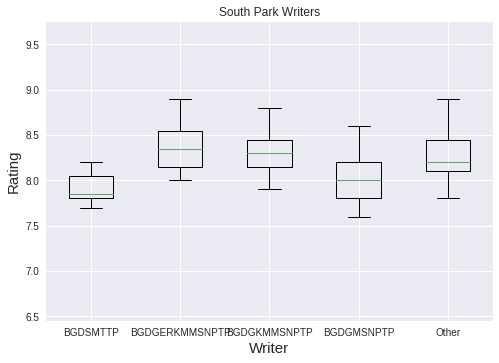

In [0]:
# Special ANOVA on Writer
import numpy as np
from scipy.stats import mstats
BGDSMTTP = sp.loc[sp['Writer'] == "Brian Graden & Dan Sterling & Matt Stone & Trey Parker"]
BGDSMTTP = BGDSMTTP['Rating'].values


BGDGERKMMSNPTP = sp.loc[sp['Writer'] == "Brian Graden & David R. Goodman & Erica Rivinoja & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker"]
BGDGERKMMSNPTP = BGDGERKMMSNPTP['Rating'].values


BGDGKMMSNPTP = sp.loc[sp['Writer'] == "Brian Graden & David R. Goodman & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker"]
BGDGKMMSNPTP = BGDGKMMSNPTP['Rating'].values

BGDGMSNPTP = sp.loc[sp['Writer'] == "Brian Graden & David R. Goodman & Matt Stone & Nancy M. Pimental & Trey Parker"]
BGDGMSNPTP = BGDGMSNPTP['Rating'].values

other = sp.loc[(sp['Writer'] != 'Brian Graden & Dan Sterling & Matt Stone & Trey Parker') & (sp['Writer'] != 'Brian Graden & David R. Goodman & Erica Rivinoja & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker') 
               & (sp['Writer'] != 'Brian Graden & David R. Goodman & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker') & (sp['Writer'] != 'Brian Graden & David R. Goodman & Matt Stone & Nancy M. Pimental & Trey Parker') ]
other = other['Rating'].values
other


H, pval = mstats.kruskalwallis(BGDSMTTP, BGDGERKMMSNPTP, BGDGKMMSNPTP, BGDGMSNPTP, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")
print ''
print 'Writer Averages:'
print 'Brian Graden & Dan Sterling & Matt Stone & Trey Parker:', BGDSMTTP.mean()
print 'Brian Graden & David R. Goodman & Erica Rivinoja & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker:', BGDGERKMMSNPTP.mean()
print 'Brian Graden & David R. Goodman & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker:', BGDGKMMSNPTP.mean()
print 'Brian Graden & David R. Goodman & Matt Stone & Nancy M. Pimental & Trey Parker:', BGDGMSNPTP.mean()
print 'Other <5 episodes:', other.mean()
print''
import matplotlib.pyplot as plt  
data_to_plot = [BGDSMTTP, BGDGERKMMSNPTP, BGDGKMMSNPTP, BGDGMSNPTP, other]
plt.boxplot(data_to_plot)
plt.xticks([1, 2, 3, 4, 5], ['BGDSMTTP', 'BGDGERKMMSNPTP', 'BGDGKMMSNPTP', 'BGDGMSNPTP', 'Other'])
plt.title('South Park Writers')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Writer', fontsize=15)

The Kruskal Wallis test is the non-parametric alternative to the One Way ANOVA. Non parametric means that the test does not assume the data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA are not met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data’s values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this project is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal. The Kruskal Wallis test will identify if there is a significant difference between multiple groups.

The groupings were made in excel, on a pivot table. Writers who wrote five times or less are grouped as “Other”, and all others above five are in their own individual group.In this case, we reject the null hypothesis which means our groups are not similar. The data suggests writers do not have an impact on rating.

### Box and Whisker Plot

Text(0.5,0,u'Character')

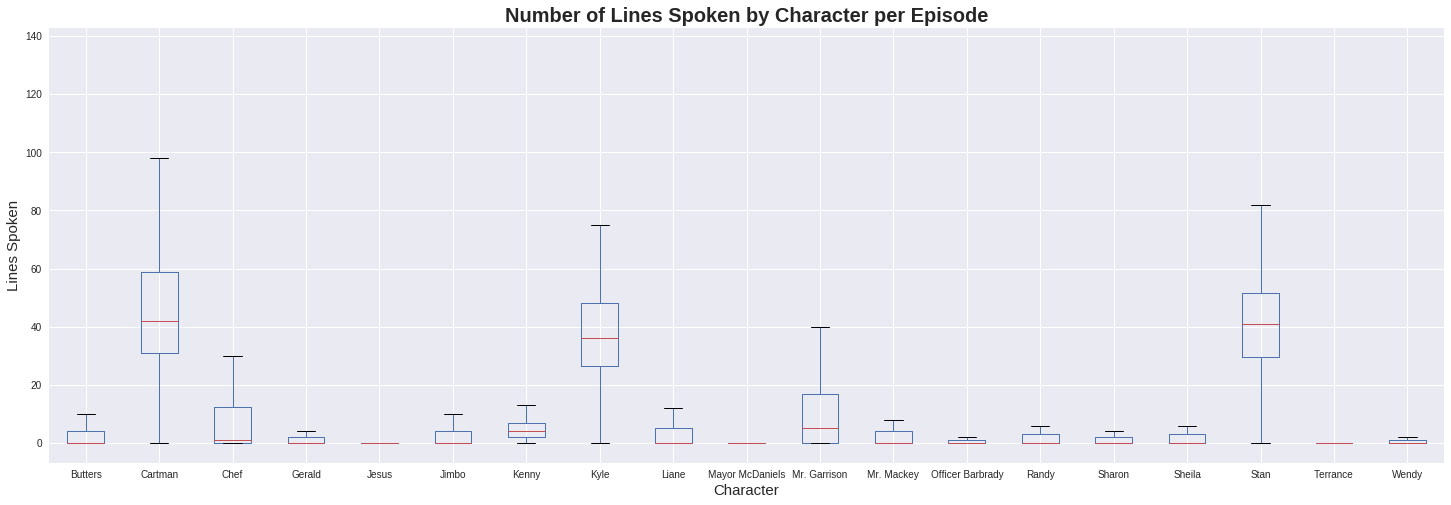

In [0]:
#Box Plot Number of lines spoken by each main character

lines = sp[['Butters', 'Cartman', 'Chef', 'Gerald', 'Jesus', 'Jimbo', 'Kenny',
        'Kyle', 'Liane', 'Mayor McDaniels', 'Mr. Garrison', 'Mr. Mackey',
        'Officer Barbrady', 'Randy', 'Sharon', 'Sheila', 'Stan', 'Terrance',
        'Wendy']]

#Plotting graph
lines.boxplot(figsize=(25,8)) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Number of Lines Spoken by Character per Episode',fontsize=20, fontweight='bold')
plt.ylabel('Lines Spoken', fontsize=15)
plt.xlabel('Character', fontsize=15) 

By using a boxplot to visualize the distribution of the number of lines spoken by each character per episode, we can see that the three main characters, Cartman, Kyle, and Stan spoke most of the lines and had a varying median ranging between 30 to 60 lines. We can also observe that Kyle and Stan have almost the same distribution, while Cartman has a much wider distribution.

### Time Series

In [0]:
sp.rename(columns={'Original Air Date':'ds',
                          'Rating':'y'}, 
                 inplace=True)
sp.head(3)

,ID,Title,Director,Writer,ds,y,All,Anchor,Announcer,Barbra Streisand,...,Token,Tom,Towelie,Truck Driver,Tweek,Wendy,Woman,Unnamed: 150,Unnamed: 151,Upd_Writer
0,1_1,"""Cartman Gets an Anal Probe""",Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,8/13/1997,8.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,Brian Graden & Dan Sterling & Matt Stone & Tre...
1,1_2,"""Weight Gain 4000""",Matt Stone & Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,8/20/1997,7.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,Brian Graden & Dan Sterling & Matt Stone & Tre...
2,1_3,"""Volcano""",Matt Stone & Trey Parker,Brian Graden & Dan Sterling & Matt Stone & Tre...,8/27/1997,7.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brian Graden & Dan Sterling & Matt Stone & Tre...


In [0]:
model = Prophet()
model.fit(sp)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
439,2002-12-08
440,2002-12-09
441,2002-12-10
442,2002-12-11
443,2002-12-12


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
439,2002-12-08,8.605615,8.118992,9.067228
440,2002-12-09,8.640402,8.163850,9.087730
441,2002-12-10,8.670345,8.153043,9.151410
442,2002-12-11,8.694573,8.217852,9.156120
443,2002-12-12,8.712332,8.187766,9.161034


Text(0.5,33,u'Year')

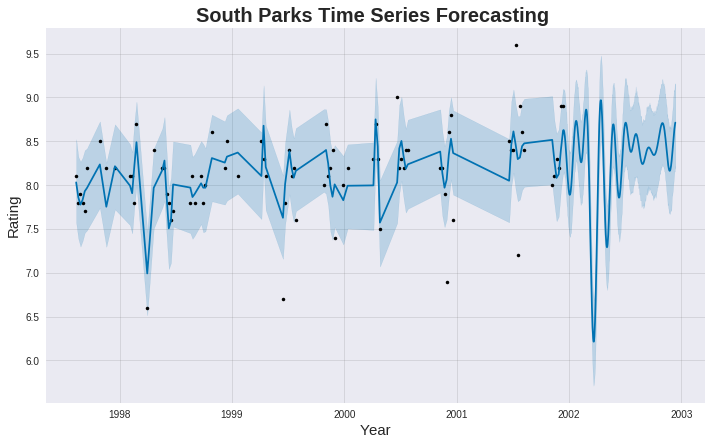

In [0]:
fig1 = model.plot(forecast)
plt.title('South Parks Time Series Forecasting ',fontsize=20, fontweight='bold')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Year', fontsize=15)

Text(0.5,1,u'South Parks Forecasted Trend Line ')

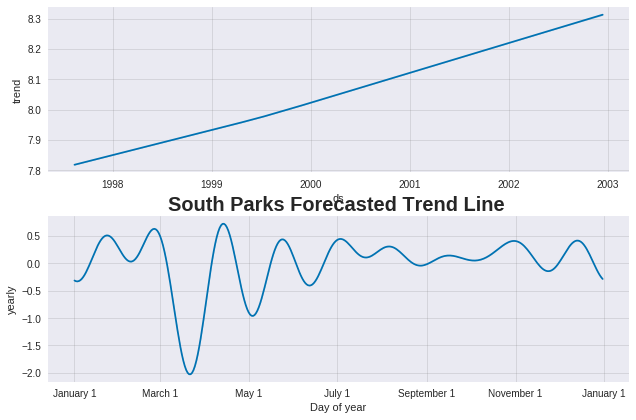

In [0]:

fig2 = model.plot_components(forecast)
plt.title('South Parks Forecasted Trend Line ',fontsize=20, fontweight='bold')


Text(0.5,0,u'Episode')

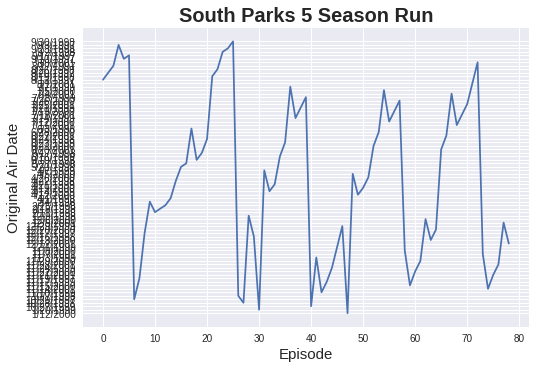

In [0]:
#Checking stationarity of time series
ts = sp['ds']

plt.plot(ts)
plt.title('South Parks 5 Season Run',fontsize=20, fontweight='bold')
plt.ylabel('Original Air Date', fontsize=15)
plt.xlabel('Episode', fontsize=15) 

### Forecasting

### Preparing Data

In [6]:
df_x = sp[['Butters', 'Cartman', 'Chef', 'Gerald', 'Jesus', 'Jimbo', 'Kenny',
        'Kyle', 'Liane', 'Mayor McDaniels', 'Mr. Garrison', 'Mr. Mackey',
        'Officer Barbrady', 'Randy', 'Sharon', 'Sheila', 'Stan', 'Terrance',
        'Wendy']] 
df_y = sp['Rating']
df_x.head(1)

,Butters,Cartman,Chef,Gerald,Jesus,Jimbo,Kenny,Kyle,Liane,Mayor McDaniels,Mr. Garrison,Mr. Mackey,Officer Barbrady,Randy,Sharon,Sheila,Stan,Terrance,Wendy
0,0.0,98.0,28.0,0.0,0.0,0.0,4.0,89.0,12.0,0.0,7.0,0.0,9.0,0.0,0.0,0.0,78.0,0.0,20.0


In [7]:
#One Hot Director
dir_one_hot = pd.get_dummies(sp['Director'])
dir_one_hot.columns = dir_one_hot.columns.str.lower()
dir_one_hot.head(1)

,adrien beard,eric stough,eric stough & trey parker,matt stone,matt stone & trey parker,trey parker
0,0,0,0,0,0,1


In [0]:
number = sp.ID.count()

i = 0
while i < number:
  if (sp.loc[i,'Writer'] != 'Brian Graden & Dan Sterling & Matt Stone & Trey Parker') and (sp.loc[i,'Writer'] != 'Brian Graden & David R. Goodman & Erica Rivinoja & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker') and (sp.loc[i,'Writer'] != 'Brian Graden & David R. Goodman & Kyle McCulloch & Matt Stone & Nancy M. Pimental & Trey Parker' and (sp.loc[i,'Writer'] != 'Brian Graden & David R. Goodman & Matt Stone & Nancy M. Pimental & Trey Parker')):
    sp.loc[i,'Upd_Writer'] = 'Other'
  else:
    sp.loc[i,'Upd_Writer']  = sp.loc[i,'Writer']
  i = i+1   
  

In [9]:
wir_one_hot = pd.get_dummies(sp['Upd_Writer'])
wir_one_hot.columns = wir_one_hot.columns.str.upper()
bb =sp.drop(columns = ['Upd_Writer'])
wir_one_hot.head(1)


,BRIAN GRADEN & DAN STERLING & MATT STONE & TREY PARKER,BRIAN GRADEN & DAVID R. GOODMAN & ERICA RIVINOJA & KYLE MCCULLOCH & MATT STONE & NANCY M. PIMENTAL & TREY PARKER,BRIAN GRADEN & DAVID R. GOODMAN & KYLE MCCULLOCH & MATT STONE & NANCY M. PIMENTAL & TREY PARKER,BRIAN GRADEN & DAVID R. GOODMAN & MATT STONE & NANCY M. PIMENTAL & TREY PARKER,OTHER
0,1,0,0,0,0


In [10]:
# Combines one Hots to Lines Spoken
df_x = df_x.join(dir_one_hot)
df_x = df_x.join(wir_one_hot)
df_x.head(1)

,Butters,Cartman,Chef,Gerald,Jesus,Jimbo,Kenny,Kyle,Liane,Mayor McDaniels,...,eric stough,eric stough & trey parker,matt stone,matt stone & trey parker,trey parker,BRIAN GRADEN & DAN STERLING & MATT STONE & TREY PARKER,BRIAN GRADEN & DAVID R. GOODMAN & ERICA RIVINOJA & KYLE MCCULLOCH & MATT STONE & NANCY M. PIMENTAL & TREY PARKER,BRIAN GRADEN & DAVID R. GOODMAN & KYLE MCCULLOCH & MATT STONE & NANCY M. PIMENTAL & TREY PARKER,BRIAN GRADEN & DAVID R. GOODMAN & MATT STONE & NANCY M. PIMENTAL & TREY PARKER,OTHER
0,0.0,98.0,28.0,0.0,0.0,0.0,4.0,89.0,12.0,0.0,...,0,0,0,0,1,1,0,0,0,0


In [0]:
#Seperates Data for training and testing
import sklearn
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(df_x,df_y,test_size = .3, random_state = 5)

### Linear Regression

Score:  -1.1689617698308732
Mean Squared Error:  0.5310567333320279
----------------------------------------------------------------


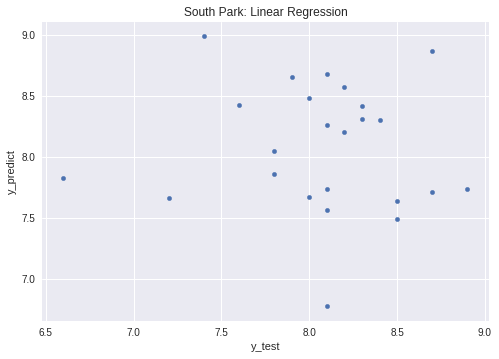

In [34]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'South Park: Linear Regression')

### K Neighbors Regression

In [35]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = range(3,15)
leaf_size = range(25,35)
p=[1,2]

param_grid = dict(n_neighbors=n_neighbors, leaf_size=leaf_size)


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.365823 using {'n_neighbors': 7, 'leaf_size': 25}


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score:  -0.5274908942517678
Mean Squared Error:  0.3739965986394562
----------------------------------------------------------------


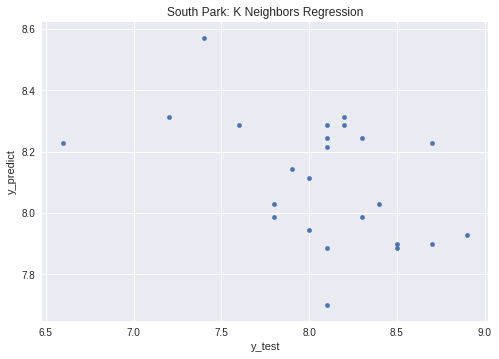

In [36]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7, leaf_size = 25)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'South Park: K Neighbors Regression')

### Stochastic Gradient Descent Regression

In [37]:
from sklearn import metrics
import numpy


param_grid = dict(loss = [
    'squared_loss',
    'huber',
    'epsilon_insensitive', 
    'squared_epsilon_insensitive'
], max_iter = numpy.arange(100,2000,50))


grid_search = GridSearchCV(linear_model.SGDRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -1.639140 using {'loss': 'huber', 'max_iter': 200}


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score:  -18.71248780958548
Mean Squared Error:  4.826479437128194
----------------------------------------------------------------


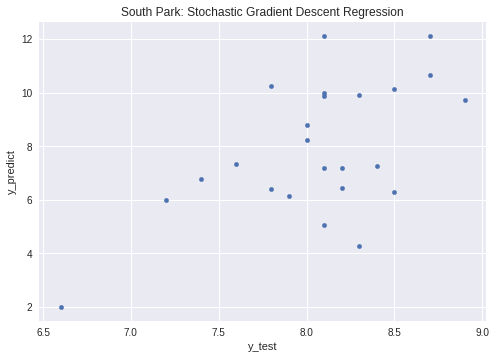

In [38]:
model = linear_model.SGDRegressor(loss = 'huber', max_iter = 1350)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'South Park: Stochastic Gradient Descent Regression')

### Decision Tree

In [39]:
from sklearn import metrics

param_grid = dict(max_depth = range(3,46))


grid_search = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.443772 using {'max_depth': 8}


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score:  -1.758647554353983
Mean Squared Error:  0.675437612136358
-----------------a-----------------------------------------------


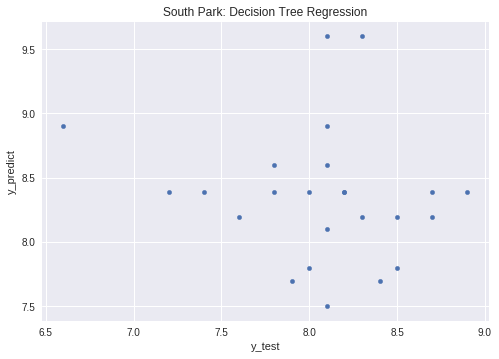

In [40]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 8)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'South Park: Decision Tree Regression')

### Neural Network

In [41]:
from sklearn import metrics
from sklearn import neural_network
import numpy

param_grid = dict(hidden_layer_sizes = numpy.arange(150, 300, 20),
                 activation = ['identity', 'logistic', 'tanh', 'relu'])


grid_search = GridSearchCV(sklearn.neural_network.MLPRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -0.529954 using {'activation': 'logistic', 'hidden_layer_sizes': 150}


Score:  -0.2420669661962922
Mean Squared Error:  0.30411233375462343
-----------------a-----------------------------------------------


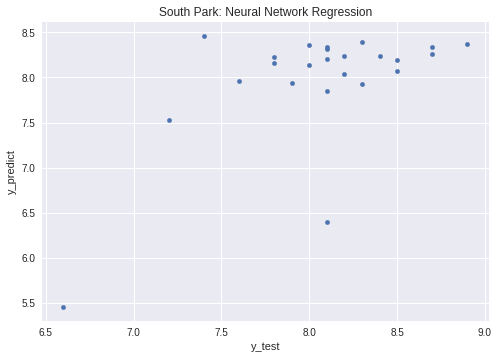

In [42]:
from sklearn import neural_network
model = sklearn.neural_network.MLPRegressor(activation = 'logistic', hidden_layer_sizes = 150)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'South Park: Neural Network Regression')

### Decision Forest

In [46]:
from sklearn import metrics
from sklearn import ensemble
import numpy

param_grid = dict(n_estimators = numpy.arange(5,50,5), max_depth = numpy.arange(3,46) )


grid_search = GridSearchCV(sklearn.ensemble.RandomForestRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.352815 using {'n_estimators': 35, 'max_depth': 15}


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score:  -0.401671376910691
Mean Squared Error:  0.343190476190477
----------------------------------------------------------------


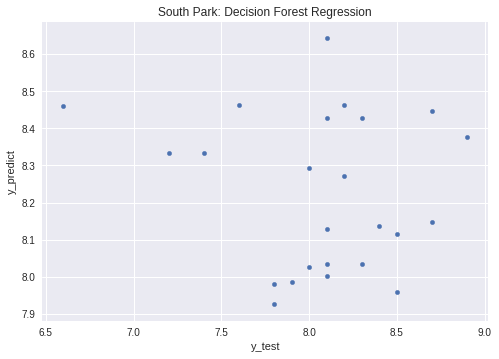

In [47]:
from sklearn import ensemble


model = sklearn.ensemble.RandomForestRegressor(n_estimators = 35, max_depth = 15)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'South Park: Decision Forest Regression')
